<a href="https://colab.research.google.com/github/racrijoli/FinalProject_Coderhouse/blob/main/Projeto_final_Coderhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the packages we'll use in this project.

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import train_test_split

import urllib.request
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from pandas_profiling import ProfileReport

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import ks_2samp
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score

mpl.style.use("ggplot")

In [ ]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exploratory Data Analysis and Data Wrangling.

In [ ]:
# Selecting columns we'll use in the project.

df = pd.read_csv("/content/ESS10.csv")

df2 = df[["cntry", "netusoft", "polintr", "psppsgva", "psppipla", "cptppola",
          "vote", "donprty", "happy", "gndr", "yrbrn"]]

df2

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (159,165,167,578) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cntry,netusoft,polintr,psppsgva,psppipla,cptppola,vote,donprty,happy,gndr,yrbrn
0,BG,1,4,1,2,2,2,2,6,2,1945
1,BG,5,1,4,4,4,1,2,9,1,1978
2,BG,5,3,3,2,2,1,2,5,2,1971
3,BG,5,4,1,1,7,2,2,3,2,1970
4,BG,5,1,3,1,1,1,2,3,1,1951
...,...,...,...,...,...,...,...,...,...,...,...
33346,SK,2,4,3,2,1,1,2,5,1,1954
33347,SK,4,2,3,2,2,1,2,8,1,1958
33348,SK,2,2,3,1,1,1,2,7,1,1973
33349,SK,5,4,3,2,1,1,2,7,2,1972


In [ ]:
# We're concerned about this dataset's size, as we intend to run some Machine 
# Learning models on it on our personal computers. Let's select 14 countries out
# of the 25 included in this round — roughly 50% of the sample. These are the ones
# we chose:

# CH Switzerland
# CZ Czechia
# EE Estonia
# FI Finland
# FR France
# GR Greece
# IT Ireland
# NL Netherlands
# NO Norway
# PT Portugal

df3 = df2.loc[(df2["cntry"] == "BE") | (df2["cntry"] == "CH") | 
              (df2["cntry"] == "CZ") | (df2["cntry"] == "DK") |
              (df2["cntry"] == "EE") | (df2["cntry"] == "FI") |
              (df2["cntry"] == "FR") | (df2["cntry"] == "GB") |
              (df2["cntry"] == "GR") | (df2["cntry"] == "IE") |
              (df2["cntry"] == "IT") | (df2["cntry"] == "NL") |
              (df2["cntry"] == "NO") | (df2["cntry"] == "PT")]

df3

,cntry,netusoft,polintr,psppsgva,psppipla,cptppola,vote,donprty,happy,gndr,yrbrn
2718,CH,5,3,3,2,2,1,2,8,1,1964
2719,CH,5,4,3,3,3,1,2,10,2,1989
2720,CH,1,3,2,3,2,2,2,10,2,1932
2721,CH,5,2,3,2,1,1,1,7,1,1999
2722,CH,5,1,4,3,4,1,8,7,2,1950
...,...,...,...,...,...,...,...,...,...,...,...
30676,PT,5,2,3,2,2,1,2,5,1,1943
30677,PT,1,4,4,3,1,1,2,10,2,1948
30678,PT,5,2,4,4,3,1,2,8,2,1973
30679,PT,5,4,2,1,1,2,2,10,2,1970


In [ ]:
# Before beginning our Exploratory Data Analysis, let's see how participants 
# are divided by gender. It's roughly 53,4% women (coded as "2") and 46,6% men
# (coded as "1"). We will replace these numbers with "W" and "M", respectively,
# but let's keep it this way for now.

s = df3.gndr
counts = s.value_counts()
percent = s.value_counts(normalize = True)
percent100 = s.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
2,10114,0.525321,52.5%
1,9139,0.474679,47.5%


In [ ]:
# Let's see what kind of data we have here, shall we? With the notable exception
# of "cntry", everything else is coded as a number, hence the int64. Apropos,
# here is what these column names mean:

# cntry - country; netusoft - internet use, how often;
# polintr - how interested in politics;
# psppsgva - political system allows people to have a say in what government does; 
# psppipla - political system allows people to have influence on politics; 
# cptppola - confident in own ability to participate in politics;
# vote - voted last national election;
# donprty - donated to or participated in political party or pressure group
# last 12 months;
# imbgeco - immigration bad or good for country's economy;
# happy - how happy are you;
# gndr - gender;
# yrbrn - year of birth.

df3.dtypes

cntry       object
netusoft     int64
polintr      int64
psppsgva     int64
psppipla     int64
cptppola     int64
vote         int64
donprty      int64
happy        int64
gndr         int64
yrbrn        int64
dtype: object

In [ ]:
type(df3)

pandas.core.frame.DataFrame

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19253 entries, 2718 to 30680
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cntry     19253 non-null  object
 1   netusoft  19253 non-null  int64 
 2   polintr   19253 non-null  int64 
 3   psppsgva  19253 non-null  int64 
 4   psppipla  19253 non-null  int64 
 5   cptppola  19253 non-null  int64 
 6   vote      19253 non-null  int64 
 7   donprty   19253 non-null  int64 
 8   happy     19253 non-null  int64 
 9   gndr      19253 non-null  int64 
 10  yrbrn     19253 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1.8+ MB


In [ ]:
df3.head()

,cntry,netusoft,polintr,psppsgva,psppipla,cptppola,vote,donprty,happy,gndr,yrbrn
2718,CH,5,3,3,2,2,1,2,8,1,1964
2719,CH,5,4,3,3,3,1,2,10,2,1989
2720,CH,1,3,2,3,2,2,2,10,2,1932
2721,CH,5,2,3,2,1,1,1,7,1,1999
2722,CH,5,1,4,3,4,1,8,7,2,1950


In [ ]:
df3.tail()

,cntry,netusoft,polintr,psppsgva,psppipla,cptppola,vote,donprty,happy,gndr,yrbrn
30676,PT,5,2,3,2,2,1,2,5,1,1943
30677,PT,1,4,4,3,1,1,2,10,2,1948
30678,PT,5,2,4,4,3,1,2,8,2,1973
30679,PT,5,4,2,1,1,2,2,10,2,1970
30680,PT,5,3,3,3,2,2,2,9,2,1984


In [ ]:
# Most respondents were born in 1960. In a close second place, 1970. In third
# place, 1972. In fourth place, 1965, and in fifth place, 1980.

df3["yrbrn"].value_counts()

1960    400
1970    391
1972    383
1965    366
1980    365
       ... 
1933     51
1932     41
1934     39
8888     20
9999      5
Name: yrbrn, Length: 79, dtype: int64

In [ ]:
# Let's start changing a few things in this dataset. We'll start with "yrbrn".
# We want to convert it to participants' age — or at least an estimate, given
# that we do not know their birthdays.

import datetime
import time
from datetime import datetime

today_year = datetime.now().year
df3['age'] = datetime.now().year
df3['age'] = df3['age'] - df3['yrbrn']
df3

<ipython-input-89-5e0aa23f5c53>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age'] = datetime.now().year
<ipython-input-89-5e0aa23f5c53>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age'] = df3['age'] - df3['yrbrn']


,cntry,netusoft,polintr,psppsgva,psppipla,cptppola,vote,donprty,happy,gndr,yrbrn,age
2718,CH,5,3,3,2,2,1,2,8,1,1964,59
2719,CH,5,4,3,3,3,1,2,10,2,1989,34
2720,CH,1,3,2,3,2,2,2,10,2,1932,91
2721,CH,5,2,3,2,1,1,1,7,1,1999,24
2722,CH,5,1,4,3,4,1,8,7,2,1950,73
...,...,...,...,...,...,...,...,...,...,...,...,...
30676,PT,5,2,3,2,2,1,2,5,1,1943,80
30677,PT,1,4,4,3,1,1,2,10,2,1948,75
30678,PT,5,2,4,4,3,1,2,8,2,1973,50
30679,PT,5,4,2,1,1,2,2,10,2,1970,53


In [ ]:
# Most respondents are over 50 years old

df3["age"].value_counts()

 63      400
 53      391
 51      383
 58      366
 43      365
        ... 
 90       51
 91       41
 89       39
-6865     20
-7976      5
Name: age, Length: 79, dtype: int64

In [ ]:
df3.describe()

,netusoft,polintr,psppsgva,psppipla,cptppola,vote,donprty,happy,gndr,yrbrn,age
count,19253.000000,19253.000000,19253.000000,19253.000000,19253.000000,19253.000000,19253.000000,19253.000000,19253.000000,19253.000000,19253.000000
mean,4.218823,2.727887,2.389238,2.313769,2.259025,1.470576,1.971018,7.528385,1.525321,2007.613151,15.386849
std,1.398574,0.936078,1.244332,1.232303,1.302263,0.977797,0.518904,4.300593,0.499371,474.106024,474.106024
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1931.000000,-7976.000000
25%,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,1957.000000,37.000000
50%,5.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,8.000000,2.000000,1970.000000,53.000000
75%,5.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,8.000000,2.000000,1986.000000,66.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2.000000,9999.000000,92.000000


In [ ]:
df3.groupby(["gndr", "cntry"]).mean()

netusoft   polintr  psppsgva  psppipla  cptppola      vote  \
gndr cntry                                                               
1    CH     4.557545  2.267263  3.216113  3.052430  2.974425  1.744246   
     CZ     4.206673  3.025950  2.510658  2.207600  2.063021  1.522706   
     EE     4.160173  2.582973  2.258297  2.144300  1.985570  1.552670   
     FI     4.526923  2.262821  2.483333  2.800000  2.453846  1.287179   
     FR     4.329569  2.527721  2.354209  2.257700  2.396304  1.788501   
     GR     4.038951  2.814232  2.075655  2.079401  2.700375  1.265169   
     IT     4.060606  2.779904  1.878788  1.894737  2.358852  1.526316   
     NL     4.798667  2.068000  2.722667  2.717333  2.338667  1.193333   
     NO     4.854167  2.320833  2.975000  3.068056  2.940278  1.327778   
     PT     3.655440  2.755181  2.299223  2.041451  1.884715  1.387306   
2    CH     4.492578  2.400810  3.213225  3.059379  2.757085  1.858300   
     CZ     4.216178  3.280601  2.424481  2.094488  1.659270  1.516106   
     EE     4.108363  2.645465  2.301531  2.155477  1.872792  1.433451   
     FI     4.525721  2.396487  2.468005  2.751568  2.165621  1.259724   
     FR     4.244267  2.790628  2.346959  2.167498  2.156530  1.809571   
     GR     3.924863  3.214481  2.036885  2.051913  2.536885  1.274590   
     IT     3.808802  3.071429  1.758297  1.711400  2.069986  1.533911   
     NL     4.768056  2.259722  2.666667  2.609722  2.026389  1.212500   
     NO     4.861071  2.467438  3.068017  3.108538  2.635311  1.412446   
     PT     3.473734  3.059099  2.244841  2.008443  1.618199  1.488743   

             donprty     happy        yrbrn        age  
gndr cntry                                              
1    CH     1.867008  8.049872  2023.797954  -0.797954  
     CZ     1.969416  7.654310  1973.137164  49.862836  
     EE     1.955267  7.503608  1971.331890  51.668110  
     FI     1.923077  8.382051  1968.482051  54.517949  
     FR     1.956879  7.554415  1971.803901  51.196099  
     GR     2.089888  6.868165  2091.614232 -68.614232  
     IT     1.981659  7.449761  2064.053429 -41.053429  
     NL     1.916000  7.992000  2004.321333  18.678667  
     NO     1.844444  7.794444  1973.255556  49.744444  
     PT     1.968912  7.584197  1975.670984  47.329016  
2    CH     1.906883  8.124157  1994.991903  28.008097  
     CZ     2.006442  7.429492  1972.364352  50.635648  
     EE     1.964664  7.590106  1967.738516  55.261484  
     FI     1.948557  8.207026  1968.313676  54.686324  
     FR     1.968096  7.493519  1989.591226  33.408774  
     GR     2.092213  6.579235  2089.516393 -66.516393  
     IT     2.023810  7.344877  2067.920635 -44.920635  
     NL     1.951389  8.041667  1992.500000  30.500000  
     NO     1.836469  7.849493  1974.535456  48.464544  
     PT     1.959662  6.938086  1966.455910  56.544090

In [ ]:
# Percentage of repeated values.

((df3 == 0).sum(axis=0)/df3.shape[0])*100

cntry       0.000000
netusoft    0.000000
polintr     0.000000
psppsgva    0.000000
psppipla    0.000000
cptppola    0.000000
vote        0.000000
donprty     0.000000
happy       0.394744
gndr        0.000000
yrbrn       0.000000
age         0.000000
dtype: float64

In [ ]:
correlation = df3.corr(method = "pearson")
# correlation.head()
correlation

,netusoft,polintr,psppsgva,psppipla,cptppola,vote,donprty,happy,gndr,yrbrn,age
netusoft,1.000000,-0.169796,0.129988,0.174173,0.161954,0.004500,-0.030984,0.060028,-0.043001,0.016713,-0.016713
polintr,-0.169796,1.000000,-0.227865,-0.268067,-0.307176,0.177476,0.112514,-0.041493,0.142583,0.022238,-0.022238
psppsgva,0.129988,-0.227865,1.000000,0.554984,0.236911,0.001686,-0.033771,0.064997,-0.022549,0.010929,-0.010929
psppipla,0.174173,-0.268067,0.554984,1.000000,0.327372,-0.008568,-0.052306,0.073264,-0.039458,-0.008833,0.008833
cptppola,0.161954,-0.307176,0.236911,0.327372,1.000000,-0.027607,-0.036932,0.055184,-0.113402,0.021121,-0.021121
vote,0.004500,0.177476,0.001686,-0.008568,-0.027607,1.000000,0.045411,0.005408,0.009105,0.045574,-0.045574
donprty,-0.030984,0.112514,-0.033771,-0.052306,-0.036932,0.045411,1.000000,0.008678,0.021474,0.015000,-0.015000
happy,0.060028,-0.041493,0.064997,0.073264,0.055184,0.005408,0.008678,1.000000,-0.019835,-0.014350,0.014350
gndr,-0.043001,0.142583,-0.022549,-0.039458,-0.113402,0.009105,0.021474,-0.019835,1.000000,-0.003503,0.003503
yrbrn,0.016713,0.022238,0.010929,-0.008833,0.021121,0.045574,0.015000,-0.014350,-0.003503,1.000000,-1.000000


In [ ]:
mask = np.triu(np.ones_like(correlation))

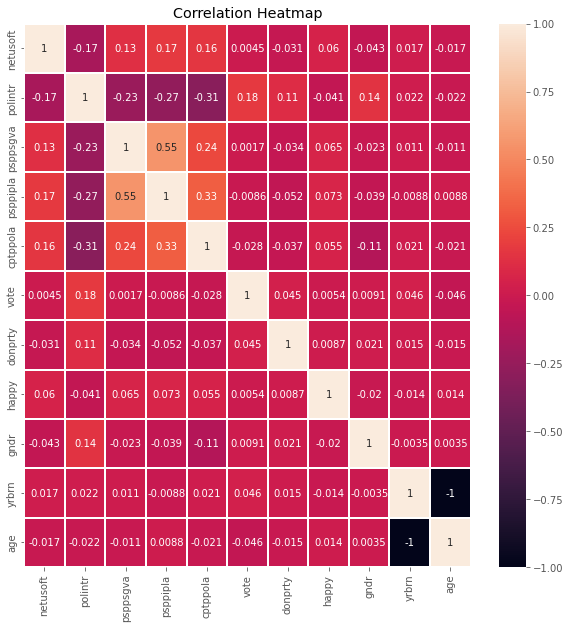

In [ ]:
# plt.figure(figsize = (15,15))

# sns.heatmap(correlation, 
#            mask = mask,
#            cbar = True, 
#            square = True, 
#            annot = True,
#            annot_kws = {"size": 15},
#            cmap= "coolwarm")

# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)
# plt.show()

plt.figure(figsize = (10,10))
heat_map = sns.heatmap(correlation, linewidth = 1 , annot = True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# We'll also use Boruta to help us narrow variables down.

!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from boruta import BorutaPy

In [ ]:
# We'll drop "cntry" for this Boruta portion, to avoid mistakes.

df4 = df3.drop("cntry", axis=1)

df4

,netusoft,polintr,psppsgva,psppipla,cptppola,vote,donprty,happy,gndr,yrbrn,age
2718,5,3,3,2,2,1,2,8,1,1964,59
2719,5,4,3,3,3,1,2,10,2,1989,34
2720,1,3,2,3,2,2,2,10,2,1932,91
2721,5,2,3,2,1,1,1,7,1,1999,24
2722,5,1,4,3,4,1,8,7,2,1950,73
...,...,...,...,...,...,...,...,...,...,...,...
30676,5,2,3,2,2,1,2,5,1,1943,80
30677,1,4,4,3,1,1,2,10,2,1948,75
30678,5,2,4,4,3,1,2,8,2,1973,50
30679,5,4,2,1,1,2,2,10,2,1970,53


In [ ]:
# Our target variable is vote.

X = df4.drop("vote", axis = 1)
y = df4.vote

In [ ]:
# Initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
# Fit Boruta
boruta.fit(np.array(X), np.array(y))

# Print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['polintr', 'cptppola', 'happy', 'yrbrn', 'age']
features in the blue area: []


In [ ]:
# Ok, let's make a new dataset with the variables Boruta suggested. We noticed
# it was even more selective than the correlation matrix...

# We'll keep "cntry" in this one because we want to be able to look at the
# results geographically later on when we start plotting these variables.

df5 = df3[["cntry", "vote", "polintr", "psppipla", "donprty", "happy", "yrbrn",
           "age"]]

df5

,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age
2718,CH,1,3,2,2,8,1964,59
2719,CH,1,4,3,2,10,1989,34
2720,CH,2,3,3,2,10,1932,91
2721,CH,1,2,2,1,7,1999,24
2722,CH,1,1,3,8,7,1950,73
...,...,...,...,...,...,...,...,...
30676,PT,1,2,2,2,5,1943,80
30677,PT,1,4,3,2,10,1948,75
30678,PT,1,2,4,2,8,1973,50
30679,PT,2,4,1,2,10,1970,53


In [ ]:
# Now, our final task before moving on to the Machine Learning portion of this
# project: removing non-answers from the dataset. We simply consulted the
# Codebook and saw how these non-answers were coded for each variable.

# We decided to remove participants who were not eligible to vote (code 3) because
# this does not represent a choice in not participating in elections, rather a
# sanction or limit not dependent on said participant's wishes.

df6 = df5.loc[(df5["vote"] < 3) & (df5["polintr"] < 7) & (df5["psppipla"] < 7) & 
              (df5["donprty"] < 7) & (df5["happy"] < 77) & (df5["yrbrn"] < 7777)]

df6

,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age
2718,CH,1,3,2,2,8,1964,59
2719,CH,1,4,3,2,10,1989,34
2720,CH,2,3,3,2,10,1932,91
2721,CH,1,2,2,1,7,1999,24
2724,CH,1,3,3,2,8,1988,35
...,...,...,...,...,...,...,...,...
30676,PT,1,2,2,2,5,1943,80
30677,PT,1,4,3,2,10,1948,75
30678,PT,1,2,4,2,8,1973,50
30679,PT,2,4,1,2,10,1970,53


# XGBoost.

In [ ]:
# Our goal is to see what influences perception on democracy across Europe. We 
# chose "vote" as our target variable because it seems like the straightest 
# variable in this ESS dataset portraying participant's belief in democracy's
# rituals, so to speak.

# With XGBoost, we want to see how the variables recommended by Boruta fare in
# predicting people's propension to actually vote in elections. Let's do this.

# Disclaimer: since "cntry" is not an int, we'll create a new dataset from df6
# just to use it in this XGBoost exercise. We'll return to df6 on this project's
# final portion.

import xgboost as xgb

df7 = df6.drop("cntry", axis = 1)

X = df7.drop("vote", axis = 1)
y = df7.vote

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'reg:logistic', 
                            n_estimators = 50, 
                            max_depth = 5,
                            reg_alpha = 0.2,
                            reg_lambda  = 0.2,
                            learning_rate = 0.2).fit(X_train,y_train)

In [ ]:
y_test_pred = clf_xgb.predict(X_test) #Pred Test

In [ ]:
# Accuracy is not that great. Let's try other models to see if something else
# works better before hypertuning parameters.

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% Test:',test_accuracy)

% Test: 0.7828242760809203


# LightGBM.

In [ ]:
import lightgbm as lgb #pip install lightgbm

In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Accuracy. A bit worse than XGBoost.

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7834


# Gradient Boosting.

In [ ]:
# Let's do a DecisionTreeClassifier just for fun.

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7489091630305434

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Now Gradient Boosting. That looks slightly better!

gbrt = GradientBoostingClassifier(random_state = 42)
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.7873859579531932

In [ ]:
gbrt = GradientBoostingClassifier(loss = "deviance",
                                  n_estimators = 75,
                                  max_depth = 3,
                                  subsample = 0.2,
                                  random_state = 42
                                    )
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test)

print(gbrt.score(X_test, y_test), gbrt.score(X_train, y_train))

0.7846092820309402 0.7931474239074987


# Adaboost.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators = 50, 
                         learning_rate = 1,
                         )

In [ ]:
# Adjusting the model.

model = ada.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Accuracy. Adaboost performed better than the other models. Let's stick with it.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7850059500198334


# Hypertuning parameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
# Defining hyperparameters.

param_grid = {'n_neighbors': np.arange(1, 10),
              'weights': ['uniform', 'distance'], 
              'algorithm':['auto', 'kd_tree']}

model = GridSearchCV(knn, param_grid = param_grid, cv = 5, scoring = "accuracy")

In [ ]:
# KNN model with the defined grid and Fold = 5.

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Melhores parametros: "+str(model.best_params_))
print("Melhor Score: "+str(model.best_score_)+'\n')

Melhores parametros: {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
Melhor Score: 0.7771641572055936



In [ ]:
# Results.

scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009273,0.000687,0.063141,0.005350,auto,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.687633,0.704207,0.690901,0.694728,0.687925,0.693079,0.006124,33
1,0.008626,0.000216,0.010574,0.000148,auto,1,distance,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.687633,0.704207,0.690901,0.694728,0.687925,0.693079,0.006124,33
2,0.012361,0.003031,0.089688,0.025656,auto,2,uniform,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh...",0.754356,0.762006,0.761054,0.761480,0.771684,0.762116,0.005537,11
3,0.013810,0.001761,0.023140,0.002314,auto,2,distance,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh...",0.741606,0.757756,0.744898,0.745323,0.753401,0.748597,0.006004,25
4,0.012252,0.000160,0.102897,0.004012,auto,3,uniform,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",0.735232,0.742456,0.732993,0.746173,0.734694,0.738310,0.005096,29
5,0.012014,0.000353,0.021517,0.000625,auto,3,distance,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",0.728432,0.736507,0.729592,0.736395,0.730867,0.732358,0.003429,31
6,0.012138,0.000267,0.120892,0.038341,auto,4,uniform,"{'algorithm': 'auto', 'n_neighbors': 4, 'weigh...",0.762431,0.771781,0.765306,0.771259,0.773810,0.768917,0.004306,5
7,0.036141,0.010039,0.057620,0.012447,auto,4,distance,"{'algorithm': 'auto', 'n_neighbors': 4, 'weigh...",0.742456,0.754781,0.745323,0.753827,0.750425,0.749362,0.004784,21
8,0.029686,0.008815,0.213967,0.074298,auto,5,uniform,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.748406,0.763706,0.750425,0.758929,0.752976,0.754888,0.005651,13
9,0.014439,0.001673,0.028019,0.001091,auto,5,distance,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.739482,0.748831,0.737245,0.750000,0.745748,0.744261,0.005062,27


In [ ]:
# Let's run a general test.

prediction = model.predict(X_test)

In [ ]:
# Accuracy. This is disappointing: Adaboost performed slightly better. For this
# dataset, hypertuning is not worth the effort.

print('Accuracy:', accuracy_score(y_test, prediction))

Accuracy: 0.7804442681475605


# Now let's plot!

In [ ]:
# Before we start plotting, let's create the final dataset with the variables
# recommended by Boruta and add the gender

df_final = df6
df_final["gndr"] = df3["gndr"]
df_final

<ipython-input-129-c6ade6f0fd0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["gndr"] = df3["gndr"]


,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age,gndr
2718,CH,1,3,2,2,8,1964,59,1
2719,CH,1,4,3,2,10,1989,34,2
2720,CH,2,3,3,2,10,1932,91,2
2721,CH,1,2,2,1,7,1999,24,1
2724,CH,1,3,3,2,8,1988,35,1
...,...,...,...,...,...,...,...,...,...
30676,PT,1,2,2,2,5,1943,80,1
30677,PT,1,4,3,2,10,1948,75,2
30678,PT,1,2,4,2,8,1973,50,2
30679,PT,2,4,1,2,10,1970,53,2


In [ ]:
# Let's change the gender from 1 to M and 2 to F
# Starting with 1 to M

updated_male = df_final["gndr"] == 1
df_final.loc[updated_male, "gndr"] = "M"
df_final

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age,gndr
2718,CH,1,3,2,2,8,1964,59,M
2719,CH,1,4,3,2,10,1989,34,2
2720,CH,2,3,3,2,10,1932,91,2
2721,CH,1,2,2,1,7,1999,24,M
2724,CH,1,3,3,2,8,1988,35,M
...,...,...,...,...,...,...,...,...,...
30676,PT,1,2,2,2,5,1943,80,M
30677,PT,1,4,3,2,10,1948,75,2
30678,PT,1,2,4,2,8,1973,50,2
30679,PT,2,4,1,2,10,1970,53,2


In [ ]:
# Now changing 2 to F

updated_female = df_final["gndr"] == 2
df_final.loc[updated_female, "gndr"] = "F"
df_final

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age,gndr
2718,CH,1,3,2,2,8,1964,59,M
2719,CH,1,4,3,2,10,1989,34,F
2720,CH,2,3,3,2,10,1932,91,F
2721,CH,1,2,2,1,7,1999,24,M
2724,CH,1,3,3,2,8,1988,35,M
...,...,...,...,...,...,...,...,...,...
30676,PT,1,2,2,2,5,1943,80,M
30677,PT,1,4,3,2,10,1948,75,F
30678,PT,1,2,4,2,8,1973,50,F
30679,PT,2,4,1,2,10,1970,53,F


In [ ]:
# Testing the change made on gender

s = df_final.gndr
counts = s.value_counts()
percent = s.value_counts(normalize = True)
percent100 = s.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
F,8805,0.523982,52.4%
M,7999,0.476018,47.6%


In [ ]:
# Let's change the vote from 1 to Yes and 2 to No
# Starting with 1 to Yes

updated_vote_yes = df_final["vote"] == 1
df_final.loc[updated_vote_yes, "vote"] = "Yes"
df_final

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age,gndr
2718,CH,Yes,3,2,2,8,1964,59,M
2719,CH,Yes,4,3,2,10,1989,34,F
2720,CH,2,3,3,2,10,1932,91,F
2721,CH,Yes,2,2,1,7,1999,24,M
2724,CH,Yes,3,3,2,8,1988,35,M
...,...,...,...,...,...,...,...,...,...
30676,PT,Yes,2,2,2,5,1943,80,M
30677,PT,Yes,4,3,2,10,1948,75,F
30678,PT,Yes,2,4,2,8,1973,50,F
30679,PT,2,4,1,2,10,1970,53,F


In [ ]:
# Now changing 2 to No

updated_vote_yes = df_final["vote"] == 2
df_final.loc[updated_vote_yes, "vote"] = "No"
df_final

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age,gndr
2718,CH,Yes,3,2,2,8,1964,59,M
2719,CH,Yes,4,3,2,10,1989,34,F
2720,CH,No,3,3,2,10,1932,91,F
2721,CH,Yes,2,2,1,7,1999,24,M
2724,CH,Yes,3,3,2,8,1988,35,M
...,...,...,...,...,...,...,...,...,...
30676,PT,Yes,2,2,2,5,1943,80,M
30677,PT,Yes,4,3,2,10,1948,75,F
30678,PT,Yes,2,4,2,8,1973,50,F
30679,PT,No,4,1,2,10,1970,53,F


In [ ]:
# Let's change the donprty from 1 to Yes and 2 to No
# Starting with 1 to Yes

updated_don_yes = df_final["donprty"] == 1
df_final.loc[updated_don_yes, "donprty"] = "Yes"
df_final

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age,gndr
2718,CH,Yes,3,2,2,8,1964,59,M
2719,CH,Yes,4,3,2,10,1989,34,F
2720,CH,No,3,3,2,10,1932,91,F
2721,CH,Yes,2,2,Yes,7,1999,24,M
2724,CH,Yes,3,3,2,8,1988,35,M
...,...,...,...,...,...,...,...,...,...
30676,PT,Yes,2,2,2,5,1943,80,M
30677,PT,Yes,4,3,2,10,1948,75,F
30678,PT,Yes,2,4,2,8,1973,50,F
30679,PT,No,4,1,2,10,1970,53,F


In [ ]:
# Now changing 2 to No

updated_don_no = df_final["donprty"] == 2
df_final.loc[updated_don_no, "donprty"] = "No"
df_final

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,cntry,vote,polintr,psppipla,donprty,happy,yrbrn,age,gndr
2718,CH,Yes,3,2,No,8,1964,59,M
2719,CH,Yes,4,3,No,10,1989,34,F
2720,CH,No,3,3,No,10,1932,91,F
2721,CH,Yes,2,2,Yes,7,1999,24,M
2724,CH,Yes,3,3,No,8,1988,35,M
...,...,...,...,...,...,...,...,...,...
30676,PT,Yes,2,2,No,5,1943,80,M
30677,PT,Yes,4,3,No,10,1948,75,F
30678,PT,Yes,2,4,No,8,1973,50,F
30679,PT,No,4,1,No,10,1970,53,F


In [ ]:
%matplotlib inline
plt.close('all')

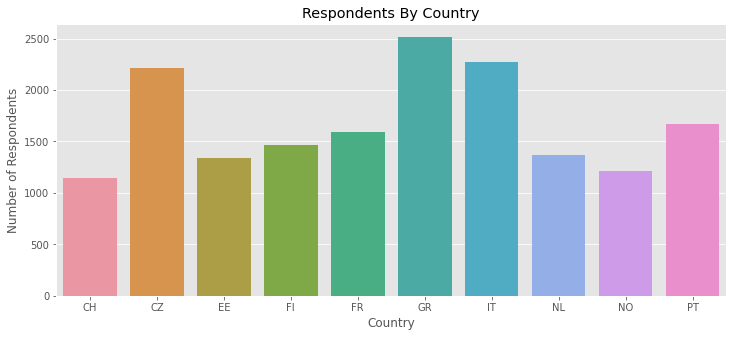

In [ ]:
# Let's start showing the answers by country

plt.figure(figsize=(12,5))
sns.countplot(x = "cntry", data = df_final)
plt.title("Respondents By Country")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.show()

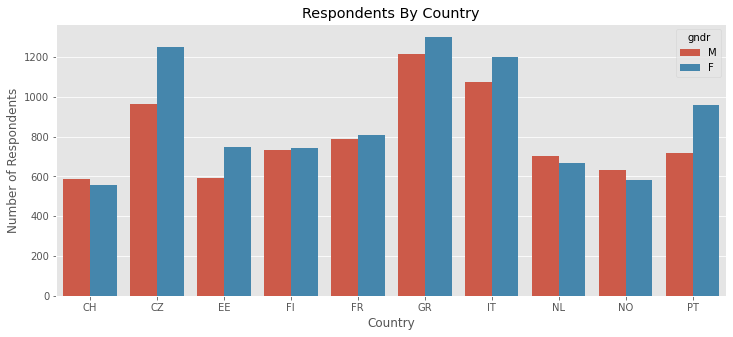

In [ ]:
# Let's see the the numbers of each country separated by gender 

plt.figure(figsize=(12,5))
sns.countplot(x = "cntry", hue = "gndr", data = df_final)
plt.title("Respondents By Country")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.show()

In [ ]:
# Showing the gender by country

gender = df_final.groupby("cntry")["gndr"].value_counts()
gender

cntry  gndr
CH     M        589
       F        556
CZ     F       1249
       M        964
EE     F        746
       M        592
FI     F        740
       M        730
FR     F        810
       M        785
GR     F       1300
       M       1216
IT     F       1198
       M       1072
NL     M        700
       F        667
NO     M        634
       F        583
PT     F        956
       M        717
Name: gndr, dtype: int64

In [ ]:
# Showing the gender in % by country

gender_per = gender.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
gender_per

cntry  gndr
CH     M       51.441048
       F       48.558952
CZ     F       56.439223
       M       43.560777
EE     F       55.754858
       M       44.245142
FI     F       50.340136
       M       49.659864
FR     F       50.783699
       M       49.216301
GR     F       51.669316
       M       48.330684
IT     F       52.775330
       M       47.224670
NL     M       51.207023
       F       48.792977
NO     M       52.095316
       F       47.904684
PT     F       57.142857
       M       42.857143
Name: gndr, dtype: float64

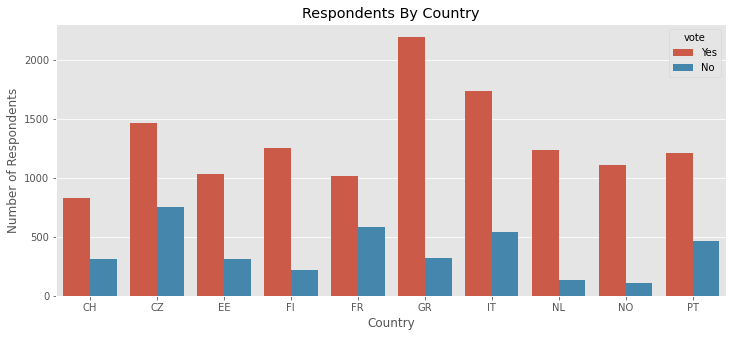

In [ ]:
# Now let's see the behavior of people from each country on the vote matter. 

plt.figure(figsize=(12,5))
sns.countplot(x = "cntry", hue = "vote", data = df_final)
plt.title("Respondents By Country")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.show()

In [ ]:
# Showing the numbers by country

country_vote = df_final.groupby("cntry")["vote"].value_counts()
country_vote

cntry  vote
CH     Yes      831
       No       314
CZ     Yes     1462
       No       751
EE     Yes     1028
       No       310
FI     Yes     1253
       No       217
FR     Yes     1015
       No       580
GR     Yes     2193
       No       323
IT     Yes     1732
       No       538
NL     Yes     1231
       No       136
NO     Yes     1109
       No       108
PT     Yes     1212
       No       461
Name: vote, dtype: int64

In [ ]:
# Showing the % by country

country_vote_per = country_vote.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
country_vote_per

cntry  vote
CH     Yes     72.576419
       No      27.423581
CZ     Yes     66.064166
       No      33.935834
EE     Yes     76.831091
       No      23.168909
FI     Yes     85.238095
       No      14.761905
FR     Yes     63.636364
       No      36.363636
GR     Yes     87.162162
       No      12.837838
IT     Yes     76.299559
       No      23.700441
NL     Yes     90.051207
       No       9.948793
NO     Yes     91.125719
       No       8.874281
PT     Yes     72.444710
       No      27.555290
Name: vote, dtype: float64

In [ ]:
# Table of happiness level of each country

pd.crosstab(df_final.cntry, df_final.happy)

happy,0,1,2,3,4,5,6,7,8,9,10
cntry,,,,,,,,,,,
CH,1,2,3,10,9,31,44,159,417,298,171
CZ,19,18,35,51,75,289,319,493,486,258,170
EE,4,0,10,20,18,138,108,235,432,216,157
FI,1,3,7,11,24,36,50,162,471,541,164
FR,5,3,13,19,28,144,139,342,517,231,154
GR,6,4,24,62,123,306,505,776,540,143,27
IT,12,3,21,54,82,144,311,651,695,183,114
NL,1,2,6,7,17,20,72,244,595,305,98
NO,0,3,7,23,17,56,64,205,397,290,155


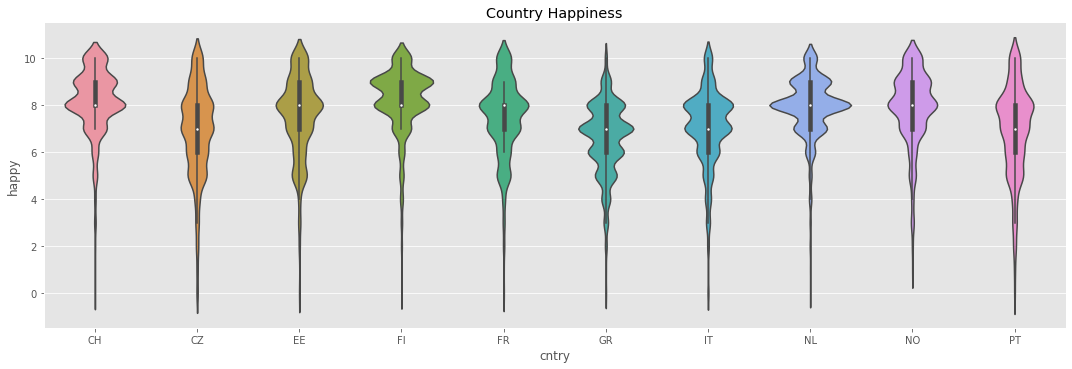

In [ ]:
# Violin plot showing the happiness level of each country

ax = sns.catplot(data=df_final, kind="violin", x="cntry", y="happy", split=True, 
                 height=5, aspect=3)
ax.set(title="Country Happiness")



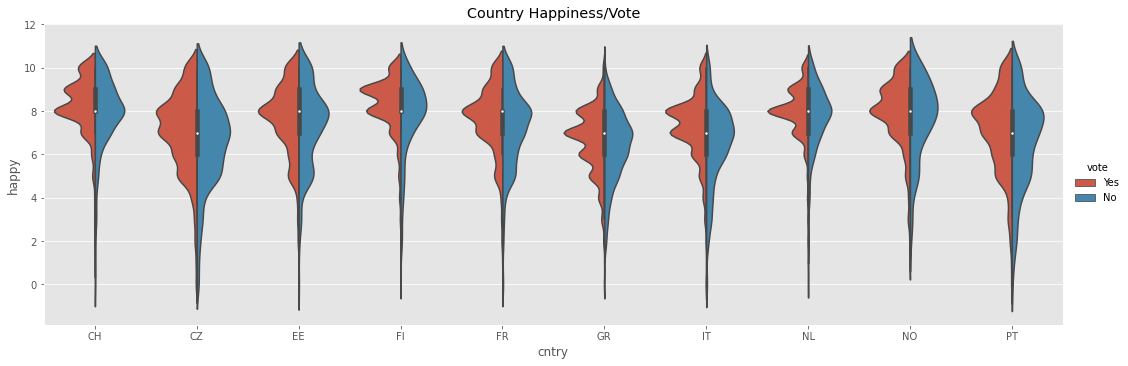

In [ ]:
# Now let's see the relationship between our target vote and happiness

ax = sns.catplot(data=df_final, kind="violin", x="cntry", y="happy", hue="vote", 
                 split=True, height=5, aspect=3)
ax.set(title="Country Happiness/Vote")

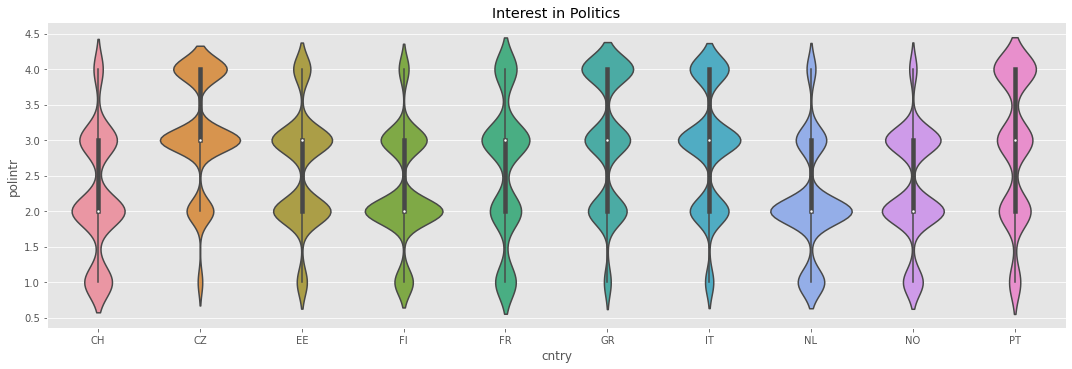

In [ ]:
# Now let's check how interested people are in politics in each country

ax = sns.catplot(data=df_final, kind="violin", x="cntry", y="polintr", split=True, 
                 height=5, aspect=3)
ax.set(title="Interest in Politics")

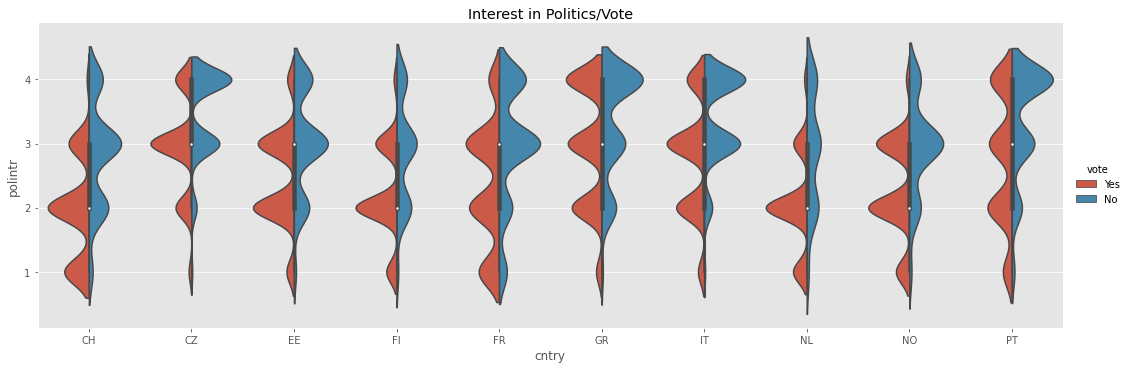

In [ ]:
# Checking the relationship between how interested people are in politics and 
# voting

ax = sns.catplot(data=df_final, kind="violin", x="cntry", y="polintr", hue="vote",
                 split=True, height=5, aspect=3)
ax.set(title="Interest in Politics/Vote")

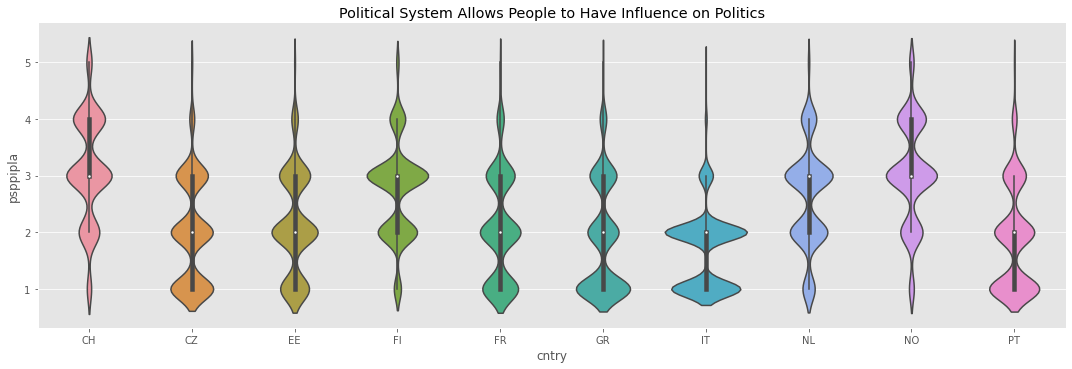

In [ ]:
# Let's check the variable psppipla (Political system allows people to have 
# influence on politics)

ax = sns.catplot(data=df_final, kind="violin", x="cntry", y="psppipla", split=True, 
                 height=5, aspect=3)
ax.set(title="Political System Allows People to Have Influence on Politics")

In [ ]:
# Showing the numbers of donation by country

country_donation = df_final.groupby("cntry")["donprty"].value_counts()
country_donation

cntry  donprty
CH     No          961
       Yes         184
CZ     No         2142
       Yes          71
EE     No         1279
       Yes          59
FI     No         1373
       Yes          97
FR     No         1525
       Yes          70
GR     No         2440
       Yes          76
IT     No         2162
       Yes         108
NL     No         1218
       Yes         149
NO     No          969
       Yes         248
PT     No         1602
       Yes          71
Name: donprty, dtype: int64

In [ ]:
# Showing the % by country

country_donation_per = country_donation.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
country_donation_per

cntry  donprty
CH     No         83.930131
       Yes        16.069869
CZ     No         96.791685
       Yes         3.208315
EE     No         95.590433
       Yes         4.409567
FI     No         93.401361
       Yes         6.598639
FR     No         95.611285
       Yes         4.388715
GR     No         96.979332
       Yes         3.020668
IT     No         95.242291
       Yes         4.757709
NL     No         89.100219
       Yes        10.899781
NO     No         79.622021
       Yes        20.377979
PT     No         95.756127
       Yes         4.243873
Name: donprty, dtype: float64

In [161]:
# We want to try some plotly graphs on this dataset. Let's jazz this up!

# We want to take a look at the relationship between age and vote by country.

import plotly.express as px

fig = px.box(df_final, x="age", y="vote", points="all", color="gndr")
fig.show()